# Reaction Time in TAC Verbal Judgement

In [1]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
from string import ascii_letters
import seaborn as sns

In [2]:
# pdir = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_data/'

pdir = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_data/'

TAC_250 = pd.read_csv(pdir + 'raw_250_data.csv')
TAC_500 = pd.read_csv(pdir + 'raw_500_data.csv')
TAC_750 = pd.read_csv(pdir + 'raw_750_data.csv')
TAC_1000 = pd.read_csv(pdir + 'raw_1000_data.csv')




### Remove the duration of the stimulus from the trial RT

In [3]:
TAC_250['trial_RT'] = TAC_250['trial_RT'].apply(lambda x: x - 250)
TAC_500['trial_RT'] = TAC_500['trial_RT'].apply(lambda x: x - 500)
TAC_750['trial_RT'] = TAC_750['trial_RT'].apply(lambda x: x - 750)
TAC_1000['trial_RT'] = TAC_1000['trial_RT'].apply(lambda x: x - 1000)


### Take Natural Log of trial RT 

In [4]:
TAC_250['nl_trial_RT'] = TAC_250['trial_RT'].apply(lambda x: np.log(x))
TAC_500['nl_trial_RT'] = TAC_500['trial_RT'].apply(lambda x: np.log(x))
TAC_750['nl_trial_RT'] = TAC_750['trial_RT'].apply(lambda x: np.log(x))
TAC_1000['nl_trial_RT'] = TAC_1000['trial_RT'].apply(lambda x: np.log(x))

### STD and SEM are calculated based off of log(RT)

In [5]:
def trial_pivotTable(data):
    """
    Generate pivot tables from data after cleaning and outlier removal 
    Organizes data such that for each individual target (stimulus) the following is calulated:
    - average depth estimation
    - standard deviation
    - standard error 
    - trial RT 
    """
    
    avg_tables = []
    std_tables = []
    result_tables = []
    cond = 0
    ###### CREATE DF WITH DATA STATISTICS AFTER OUTLIER REMOVAL ######
    for duration in data: #generate pivot tables for data statistics (avg, std, sem)
        actual = pd.pivot_table(duration,  values = ["actual_depth"], columns=['stimulus'], aggfunc=np.mean)
        actual.reset_index()
        actual_renamed = actual.rename(index={'actual_depth': 'Actual Depth'})
        
        avg = pd.pivot_table(duration,  values = ["depth_estimate"], columns=['stimulus'], aggfunc=np.mean)
        avg.reset_index()
        avg_renamed = avg.rename(index={'depth_estimate': 'Average Estimated Depth'})
        
        std = pd.pivot_table(duration, values = ["nl_trial_RT"], columns = ["stimulus"], aggfunc = np.std)
        #note - std is normalized byN-1 by default (ddof parameter = 1 by default)
        std.reset_index()
        std_renamed = std.rename(index={'nl_trial_RT': 'Standard Deviation'})
        
        sem = pd.pivot_table(duration, values = ["nl_trial_RT"], columns = ["stimulus"], aggfunc = 'sem')
        sem.reset_index()
        sem_renamed = sem.rename(index={'nl_trial_RT': 'Standard Error'})
        
        trial_RT = pd.pivot_table(duration, values = ["trial_RT"], columns = ["stimulus"], aggfunc = np.mean)
        trial_RT.reset_index()
        trial_RT_renamed = trial_RT.rename(index={'trial_RT': 'Average Trial RT'})
        
        nl_trial_RT = pd.pivot_table(duration, values = ["nl_trial_RT"], columns = ["stimulus"], aggfunc = np.mean)
        nl_trial_RT.reset_index()
        nl_trial_RT_renamed = nl_trial_RT.rename(index={'nl_trial_RT': 'NL Average Trial RT'})
        
        frames = [avg_renamed, std_renamed, sem_renamed, trial_RT_renamed, nl_trial_RT_renamed, actual_renamed] #list of pivot tables for a given duration
        result = pd.concat(frames) #merge the pivot tables for a given duration 
        result = result.T #transpose 
        result = result.sort_values(by=['Actual Depth'])

        #Label the data by duration based on condition counter (cond)
        if cond == 0:
            result["Duration"] = 250
        if cond == 1:
            result["Duration"] = 500
        if cond == 2:
            result["Duration"] = 750
        if cond == 3:
            result["Duration"] = 1000
        
        avg_tables.append(avg_renamed) #created for reference (not used in code)
        std_tables.append(std_renamed) #created for reference (not used in code)
        result_tables.append(result) #list of results for all durations 
        cond += 1 
        
    
    return result_tables

In [6]:
TAC_raw_trial_pivot = trial_pivotTable([TAC_250, TAC_500, TAC_750, TAC_1000])


In [7]:
TAC_raw_trial_pivot[0]

,Average Estimated Depth,Standard Deviation,Standard Error,Average Trial RT,NL Average Trial RT,Actual Depth,Duration
stimulus,,,,,,,
depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-target.png,1.274307,0.415587,0.063376,2808.000000,7.848549,1.1380,250
depth_duration_stimuli/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0-target.png,1.494318,0.510366,0.074445,3703.404255,8.064082,1.3065,250
depth_duration_stimuli/000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4/000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4-target.png,1.609358,0.429961,0.062059,3149.541667,7.958181,1.3370,250
depth_duration_stimuli/000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize_9/000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize_9-target.png,1.438345,0.516381,0.074533,3661.979167,8.067177,1.3545,250
depth_duration_stimuli/003587_2014-05-23_16-48-02_094959634447_rgbf002384-resize_2/003587_2014-05-23_16-48-02_094959634447_rgbf002384-resize_2-target.png,1.154267,0.455811,0.067206,3467.521739,8.045147,1.3570,250
...,...,...,...,...,...,...,...
depth_duration_stimuli/000556_2014-06-09_22-42-56_260595134347_rgbf000214-resize_1/000556_2014-06-09_22-42-56_260595134347_rgbf000214-resize_1-target.png,3.510466,0.546003,0.079643,3850.851064,8.085654,4.8415,250
depth_duration_stimuli/002305_2014-06-28_19-56-50_260595134347_rgbf000102-resize_7/002305_2014-06-28_19-56-50_260595134347_rgbf000102-resize_7-target.png,3.476073,0.383262,0.057779,3279.750000,8.020433,4.8725,250
depth_duration_stimuli/002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize_1/002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize_1-target.png,2.772930,0.539366,0.079525,4248.434783,8.185990,4.9190,250


In [8]:
def trial_getxy(data):
    """
    Extracts the data from the dataframes to a list format for plotting. 
    Args:
        df = [250, 500, 750, 1000]
        These data frames are POST all outlier cleaning. 
        
    Returns:
        actualdepths = [x_250, x_500, x_750, x_1000]
        xs = [list of individual targets]
        ys = [y_250, y_500, y_750, y_100]
        stes = [ste_250, ste_500, ste_750, ste_1000]
        
    """
    xs = []
    ys = []
    stes = []
    stds = []
    actualdepths = []
    RTs = []
    nl_RTs = []
    for table in data:
        x = []
        y = []
        ste = []
        std = []
        depths = []
        rts = []
        nl_rts = []
        for idx, row in table.iterrows():
            
            x.append(idx) #idx is the target (stimulus path)
            
            estim_avg = row["Average Estimated Depth"]
            y.append(estim_avg)
            
            standard_error = row["Standard Error"]
            ste.append(standard_error)
            
            depth = row["Actual Depth"]
            depths.append(depth)
            
            standard_deviation = row["Standard Deviation"]
            std.append(standard_deviation)  
            
            trial_RT = row['Average Trial RT']
            rts.append(trial_RT)
            
            nl_trial_RT = row['NL Average Trial RT']
            nl_rts.append(nl_trial_RT)
            
        xs.append(x)
        ys.append(y)
        stes.append(ste)
        actualdepths.append(depths)
        stds.append(std)
        RTs.append(rts)
        nl_RTs.append(nl_rts)

    return xs, ys, stes, actualdepths, stds, RTs, nl_RTs

In [9]:
TAC_trial_raw_final = trial_getxy(TAC_raw_trial_pivot)


In [10]:
import pickle
# save to pickle file 

dest = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_data/matched/VE_data.pickle'
with open(dest, 'wb') as handle:
    pickle.dump(TAC_trial_raw_final, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [11]:
TAC_trial_plot_data = TAC_trial_raw_final

## Execute this cell to prep for plotting
TAC_final_x_250 = TAC_trial_plot_data[0][0]
TAC_final_y_250 = TAC_trial_plot_data[1][0]
TAC_ste_250 = TAC_trial_plot_data[2][0]
TAC_stim_250 = TAC_trial_plot_data[3][0]
TAC_std_250 = TAC_trial_plot_data[4][0]
TAC_RT_250 = TAC_trial_plot_data[5][0]
TAC_nl_RT_250 = TAC_trial_plot_data[6][0]


TAC_final_x_500 = TAC_trial_plot_data[0][1]
TAC_final_y_500 = TAC_trial_plot_data[1][1]
TAC_ste_500 = TAC_trial_plot_data[2][1]
TAC_stim_500 = TAC_trial_plot_data[3][1]
TAC_std_500 = TAC_trial_plot_data[4][1]
TAC_RT_500 = TAC_trial_plot_data[5][1]
TAC_nl_RT_500 = TAC_trial_plot_data[6][1]


TAC_final_x_750 = TAC_trial_plot_data[0][2]
TAC_final_y_750 = TAC_trial_plot_data[1][2]
TAC_ste_750 = TAC_trial_plot_data[2][2]
TAC_stim_750 = TAC_trial_plot_data[3][2]
TAC_std_750 = TAC_trial_plot_data[4][2]
TAC_RT_750 = TAC_trial_plot_data[5][2]
TAC_nl_RT_750 = TAC_trial_plot_data[6][2]


TAC_final_x_1000 = TAC_trial_plot_data[0][3]
TAC_final_y_1000 = TAC_trial_plot_data[1][3]
TAC_ste_1000 = TAC_trial_plot_data[2][3]
TAC_stim_1000 = TAC_trial_plot_data[3][3]
TAC_std_1000 = TAC_trial_plot_data[4][3]
TAC_RT_1000 = TAC_trial_plot_data[5][3]
TAC_nl_RT_1000 = TAC_trial_plot_data[6][3]



In [12]:
TAC_raw_trial_pivot[0]

,Average Estimated Depth,Standard Deviation,Standard Error,Average Trial RT,NL Average Trial RT,Actual Depth,Duration
stimulus,,,,,,,
depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-target.png,1.274307,0.415587,0.063376,2808.000000,7.848549,1.1380,250
depth_duration_stimuli/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0-target.png,1.494318,0.510366,0.074445,3703.404255,8.064082,1.3065,250
depth_duration_stimuli/000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4/000483_2014-06-09_20-41-45_260595134347_rgbf000116-resize_4-target.png,1.609358,0.429961,0.062059,3149.541667,7.958181,1.3370,250
depth_duration_stimuli/000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize_9/000109_2014-05-14_23-41-52_260595134347_rgbf000035-resize_9-target.png,1.438345,0.516381,0.074533,3661.979167,8.067177,1.3545,250
depth_duration_stimuli/003587_2014-05-23_16-48-02_094959634447_rgbf002384-resize_2/003587_2014-05-23_16-48-02_094959634447_rgbf002384-resize_2-target.png,1.154267,0.455811,0.067206,3467.521739,8.045147,1.3570,250
...,...,...,...,...,...,...,...
depth_duration_stimuli/000556_2014-06-09_22-42-56_260595134347_rgbf000214-resize_1/000556_2014-06-09_22-42-56_260595134347_rgbf000214-resize_1-target.png,3.510466,0.546003,0.079643,3850.851064,8.085654,4.8415,250
depth_duration_stimuli/002305_2014-06-28_19-56-50_260595134347_rgbf000102-resize_7/002305_2014-06-28_19-56-50_260595134347_rgbf000102-resize_7-target.png,3.476073,0.383262,0.057779,3279.750000,8.020433,4.8725,250
depth_duration_stimuli/002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize_1/002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize_1-target.png,2.772930,0.539366,0.079525,4248.434783,8.185990,4.9190,250


In [13]:
dest = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_data/'
durations = ['250', '500', '750', '1000']

for i in range(len(TAC_raw_trial_pivot)):  
    TAC_raw_trial_pivot[i].to_csv(dest + 'rawPivot_' + durations[i] + '_RT.csv' , index=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_data/rawPivot_250_RT.csv'

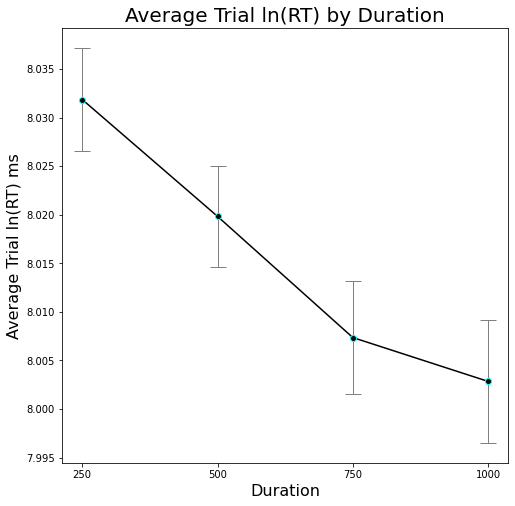

In [14]:
plt.figure(figsize=[8,8])

avg_nl_RT_stes = [stats.sem(TAC_nl_RT_250), stats.sem(TAC_nl_RT_500), stats.sem(TAC_nl_RT_750), stats.sem(TAC_nl_RT_1000)]
avg_nl_RT = [np.mean(TAC_nl_RT_250), np.mean(TAC_nl_RT_500), np.mean(TAC_nl_RT_750), np.mean(TAC_nl_RT_1000)]
xAxis = ['250', '500', '750', '1000']

plt.plot(xAxis,avg_nl_RT, color="black")
plt.errorbar(xAxis, avg_nl_RT, yerr=avg_nl_RT_stes, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "black", mec = "cyan", capsize = 8)

plt.xlabel('Duration', fontsize=16)
plt.ylabel('Average Trial ln(RT) ms', fontsize=16)
plt.title("Average Trial ln(RT) by Duration", fontsize = 20)

plt.show()

TAC m: [0.05155889]
TAC b: 7.909098320592132
TAC R-squared:  0.22164812051246574


0.222

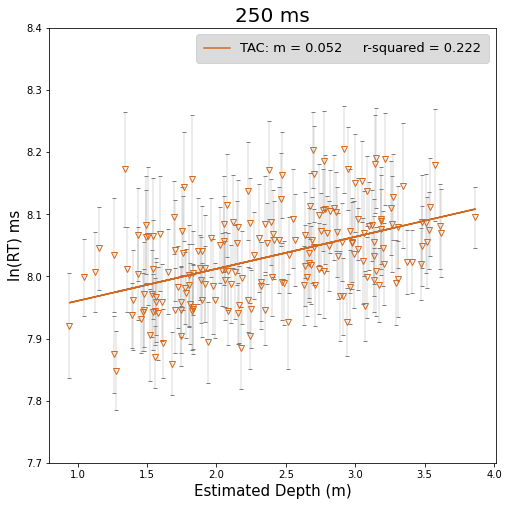

In [15]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize = [8,8])
#run regression
TAC_X_250 = np.array(TAC_final_y_250).reshape(-1,1)
TAC_y_250 = TAC_nl_RT_250
TAC_reg_250 = LinearRegression().fit(TAC_X_250, TAC_y_250)

#Generated Predictions
TAC_y_predicted_250 = TAC_reg_250.predict(TAC_X_250)
#Plot Our Actual and Predicted Values
# plt.plot(TAC_X_250, TAC_y_250, 'v', fillstyle='none', alpha = 1);
plt.plot(TAC_X_250,TAC_y_predicted_250,color='chocolate', label = 'TAC: m = ' + str(round(TAC_reg_250.coef_[0], 3))
         + '     r-squared = ' + str(round(float(TAC_reg_250.score(TAC_X_250, TAC_y_250)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Estimated Depth (m)", fontsize = 15)
plt.ylabel("ln(RT) ms", fontsize = 15)
plt.errorbar(TAC_X_250, TAC_y_250, yerr=TAC_ste_250, elinewidth = 0.3, ecolor = "gray", fmt = 'or', mfc = "white", 
             mec = "chocolate", capsize = 2, marker='v', fillstyle='none')

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


plt.yticks(np.arange(7.7, 8.5, 0.1))

#get coefficients and y intercept
print("TAC m: {0}".format(TAC_reg_250.coef_))
print("TAC b: {0}".format(TAC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("TAC R-squared: ", TAC_reg_250.score(TAC_X_250, TAC_y_250))

round(float(TAC_reg_250.score(TAC_X_250, TAC_y_250)), 3)

TAC m: [0.0537017]
TAC b: 7.890125481782818
TAC R-squared:  0.297737722016577


0.298

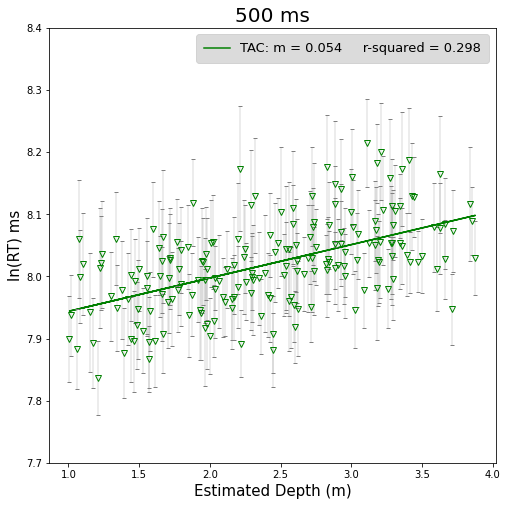

In [16]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize = [8,8])
#run regression
TAC_X_500 = np.array(TAC_final_y_500).reshape(-1,1)
TAC_y_500 = TAC_nl_RT_500
TAC_reg_500 = LinearRegression().fit(TAC_X_500, TAC_y_500)

#Generated Predictions
TAC_y_predicted_500 = TAC_reg_500.predict(TAC_X_500)
#Plot Our Actual and Predicted Values
# plt.plot(TAC_X_250, TAC_y_250, 'v', fillstyle='none', alpha = 1);
plt.plot(TAC_X_500,TAC_y_predicted_500,color='green', label = 'TAC: m = ' + str(round(TAC_reg_500.coef_[0], 3))
         + '     r-squared = ' + str(round(float(TAC_reg_500.score(TAC_X_500, TAC_y_500)), 3)))
plt.title("500 ms", fontsize = 20)
plt.xlabel("Estimated Depth (m)", fontsize = 15)
plt.ylabel("ln(RT) ms", fontsize = 15)
plt.errorbar(TAC_X_500, TAC_y_500, yerr=TAC_ste_500, elinewidth = 0.3, ecolor = "gray", fmt = 'or', mfc = "white", 
             mec = "green", capsize = 2, marker='v', fillstyle='none')

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.yticks(np.arange(7.7, 8.5, 0.1))


#get coefficients and y intercept
print("TAC m: {0}".format(TAC_reg_500.coef_))
print("TAC b: {0}".format(TAC_reg_500.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("TAC R-squared: ", TAC_reg_500.score(TAC_X_500, TAC_y_500))

round(float(TAC_reg_500.score(TAC_X_500, TAC_y_500)), 3)

TAC m: [0.05066673]
TAC b: 7.883005819102436
TAC R-squared:  0.22882295777815997


0.229

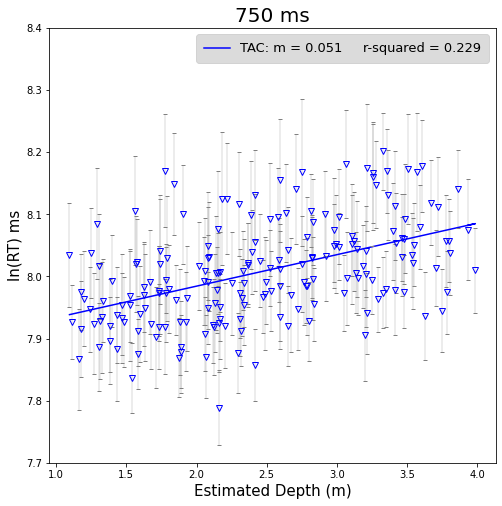

In [17]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize = [8,8])
#run regression
TAC_X_750 = np.array(TAC_final_y_750).reshape(-1,1)
TAC_y_750 = TAC_nl_RT_750
TAC_reg_750 = LinearRegression().fit(TAC_X_750, TAC_y_750)

#Generated Predictions
TAC_y_predicted_750 = TAC_reg_750.predict(TAC_X_750)
#Plot Our Actual and Predicted Values
# plt.plot(TAC_X_250, TAC_y_250, 'v', fillstyle='none', alpha = 1);
plt.plot(TAC_X_750,TAC_y_predicted_750,color='blue', label = 'TAC: m = ' + str(round(TAC_reg_750.coef_[0], 3))
         + '     r-squared = ' + str(round(float(TAC_reg_750.score(TAC_X_750, TAC_y_750)), 3)))
plt.title("750 ms", fontsize = 20)
plt.xlabel("Estimated Depth (m)", fontsize = 15)
plt.ylabel("ln(RT) ms", fontsize = 15)
plt.errorbar(TAC_X_750, TAC_y_750, yerr=TAC_ste_750, elinewidth = 0.3, ecolor = "gray", fmt = 'or', mfc = "white", 
             mec = "blue", capsize = 2, marker='v', fillstyle='none')

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.yticks(np.arange(7.7, 8.5, 0.1))

#get coefficients and y intercept
print("TAC m: {0}".format(TAC_reg_750.coef_))
print("TAC b: {0}".format(TAC_reg_750.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("TAC R-squared: ", TAC_reg_750.score(TAC_X_750, TAC_y_750))

round(float(TAC_reg_750.score(TAC_X_750, TAC_y_750)), 3)

TAC m: [0.05636006]
TAC b: 7.865862818306437
TAC R-squared:  0.23690355124192464


0.237

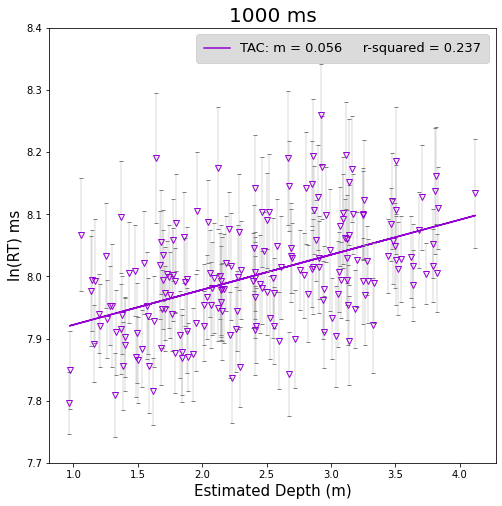

In [18]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize = [8,8])
#run regression
TAC_X_1000 = np.array(TAC_final_y_1000).reshape(-1,1)
TAC_y_1000 = TAC_nl_RT_1000
TAC_reg_1000 = LinearRegression().fit(TAC_X_1000, TAC_y_1000)

#Generated Predictions
TAC_y_predicted_1000 = TAC_reg_1000.predict(TAC_X_1000)
#Plot Our Actual and Predicted Values
# plt.plot(TAC_X_250, TAC_y_250, 'v', fillstyle='none', alpha = 1);
plt.plot(TAC_X_1000,TAC_y_predicted_1000,color='darkviolet', label = 'TAC: m = ' + str(round(TAC_reg_1000.coef_[0], 3))
         + '     r-squared = ' + str(round(float(TAC_reg_1000.score(TAC_X_1000, TAC_y_1000)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Estimated Depth (m)", fontsize = 15)
plt.ylabel("ln(RT) ms", fontsize = 15)
plt.errorbar(TAC_X_1000, TAC_y_1000, yerr=TAC_ste_1000, elinewidth = 0.3, ecolor = "gray", fmt = 'or', mfc = "white", 
             mec = "darkviolet", capsize = 2, marker='v', fillstyle='none')

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.yticks(np.arange(7.7, 8.5, 0.1))


#get coefficients and y intercept
print("TAC m: {0}".format(TAC_reg_1000.coef_))
print("TAC b: {0}".format(TAC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("TAC R-squared: ", TAC_reg_1000.score(TAC_X_1000, TAC_y_1000))

round(float(TAC_reg_1000.score(TAC_X_1000, TAC_y_1000)), 3)

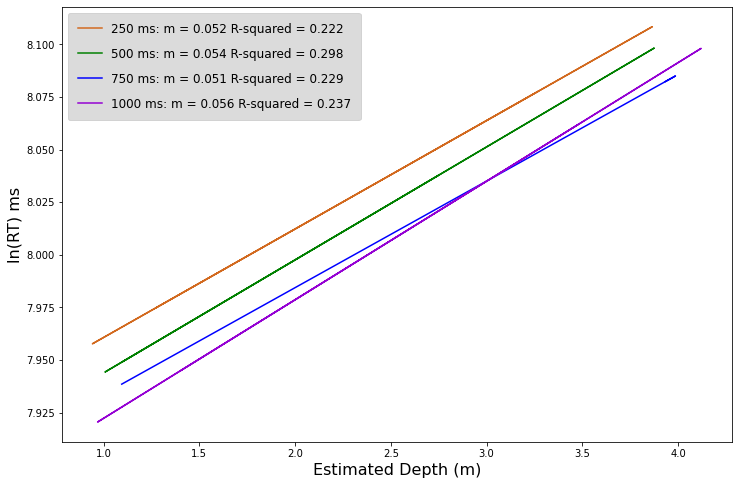

In [19]:
#Plot Our Actual and Predicted Values

plt.figure(figsize = [12, 8])

# plt.plot(X_250, y_250, 'o', color='chocolate');
plt.plot(TAC_X_250,TAC_y_predicted_250,color='chocolate', label = '250 ms: '
        + "m = " + str(round(TAC_reg_250.coef_[0], 3)) 
        + " R-squared = " + str(round(TAC_reg_250.score(TAC_X_250, TAC_y_250), 3)))

# plt.plot(X_500, y_500, 'o', color='green');
plt.plot(TAC_X_500,TAC_y_predicted_500,color='green', label = '500 ms: '
        + "m = " + str(round(TAC_reg_500.coef_[0], 3)) 
        + " R-squared = " + str(round(TAC_reg_500.score(TAC_X_500, TAC_y_500), 3)))

# plt.plot(X_750, y_750, 'o', color='blue');
plt.plot(TAC_X_750,TAC_y_predicted_750,color='blue', label = '750 ms: '
        + "m = " + str(round(TAC_reg_750.coef_[0], 3)) 
        + " R-squared = " + str(round(TAC_reg_750.score(TAC_X_750, TAC_y_750), 3)))

# plt.plot(X_1000, y_1000, 'o', color='darkviolet');
plt.plot(TAC_X_1000,TAC_y_predicted_1000,color='darkviolet', label = '1000 ms: ' 
         + "m = " + str(round(TAC_reg_1000.coef_[0], 3)) 
         + " R-squared = " + str(round(TAC_reg_1000.score(TAC_X_1000, TAC_y_1000), 3)))

# plt.title("Actual Depth vs Depth Estimate (N=192)", fontsize = 20)
plt.xlabel("Estimated Depth (m)", fontsize = 16)
plt.ylabel("ln(RT) ms", fontsize = 16)
legend = plt.legend(loc = 0, fontsize = 12, borderpad = 0.8, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

# plt.title('Average RT x Actual Depth', fontsize=20)
plt.show()

In [20]:
print('Paired T-Tests')
print("250ms vs. 500ms")
ttest_250_500 = stats.ttest_rel(TAC_RT_250, TAC_RT_500)
print(ttest_250_500)
print("250ms vs. 750ms")
ttest_250_750 = stats.ttest_rel(TAC_RT_250, TAC_RT_750)
print(ttest_250_750)
print("250ms vs. 1000ms")
ttest_250_1000 = stats.ttest_rel(TAC_RT_250, TAC_RT_1000)
print(ttest_250_1000)
print("500ms vs. 750ms")
ttest_500_750 = stats.ttest_rel(TAC_RT_500, TAC_RT_750)
print(ttest_500_750)
print("500ms vs. 1000ms")
ttest_500_1000 = stats.ttest_rel(TAC_RT_500, TAC_RT_1000)
print(ttest_500_1000)
print("750ms vs. 1000ms")
ttest_750_1000 = stats.ttest_rel(TAC_RT_750,TAC_RT_1000)
print(ttest_750_1000)

Paired T-Tests
250ms vs. 500ms
Ttest_relResult(statistic=-0.824554909589508, pvalue=0.41065286572806503)
250ms vs. 750ms
Ttest_relResult(statistic=-0.48476604984180355, pvalue=0.6283977865384369)
250ms vs. 1000ms
Ttest_relResult(statistic=0.4899253125138454, pvalue=0.6247490093547705)
500ms vs. 750ms
Ttest_relResult(statistic=0.2215984369804287, pvalue=0.824863240113752)
500ms vs. 1000ms
Ttest_relResult(statistic=1.246265860553052, pvalue=0.21419317879374467)
750ms vs. 1000ms
Ttest_relResult(statistic=0.9233189107282044, pvalue=0.357005969962656)


In [76]:
print('Paired T-Tests for ln(RTs)')
print("250ms vs. 500ms")
ttest_250_500 = stats.ttest_rel(TAC_nl_RT_250, TAC_nl_RT_500)
print(ttest_250_500)
print("250ms vs. 750ms")
ttest_250_750 = stats.ttest_rel(TAC_nl_RT_250, TAC_nl_RT_750)
print(ttest_250_750)
print("250ms vs. 1000ms")
ttest_250_1000 = stats.ttest_rel(TAC_nl_RT_250, TAC_nl_RT_1000)
print(ttest_250_1000)
print("500ms vs. 750ms")
ttest_500_750 = stats.ttest_rel(TAC_nl_RT_500, TAC_nl_RT_750)
print(ttest_500_750)
print("500ms vs. 1000ms")
ttest_500_1000 = stats.ttest_rel(TAC_nl_RT_500, TAC_nl_RT_1000)
print(ttest_500_1000)
print("750ms vs. 1000ms")
ttest_750_1000 = stats.ttest_rel(TAC_nl_RT_750,TAC_nl_RT_1000)
print(ttest_750_1000)

Paired T-Tests for ln(RTs)
250ms vs. 500ms
Ttest_relResult(statistic=1.8028089853983698, pvalue=0.07299456423174844)
250ms vs. 750ms
Ttest_relResult(statistic=3.2878494929727426, pvalue=0.00120167967092875)
250ms vs. 1000ms
Ttest_relResult(statistic=3.7217947822757314, pvalue=0.00026011553454258457)
500ms vs. 750ms
Ttest_relResult(statistic=1.8434469396294006, pvalue=0.06681325275745377)
500ms vs. 1000ms
Ttest_relResult(statistic=2.1867706891074943, pvalue=0.02997435158985084)
750ms vs. 1000ms
Ttest_relResult(statistic=0.58495251955554, pvalue=0.5592700259712586)
